### ASSIGNMENT

<b>Problem Statement:</b>
You are provided with historical sales data for 45 stores of a Retail chain located in different
regions. Each store contains a number of departments, and you are tasked with predicting the
department-wide sales for each store.

The data is provided in 4 different CSVs.



In [1]:
# importing basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
%matplotlib inline

# settings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading data
features=pd.read_csv("features.csv")
stores=pd.read_csv("stores.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
df_names=['features','stores','train','test']
df_list=[features,stores,train,test]
for i in range(4):
    print('--'*15)
    print(f'Dataframe {df_names[i]} has {df_list[i].shape[0]} rows and {df_list[i].shape[1]} columns.')
    print('--'*15)
    display(df_list[i].head(5))

------------------------------
Dataframe features has 8190 rows and 12 columns.
------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


------------------------------
Dataframe stores has 45 rows and 3 columns.
------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


------------------------------
Dataframe train has 421570 rows and 5 columns.
------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


------------------------------
Dataframe test has 115064 rows and 4 columns.
------------------------------


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [4]:
# checking time duration of records
for i in [0,2,3]:
    print(f'Dataframe {df_names[i]} contains data from {df_list[i].Date.min()} to {df_list[i].Date.max()}.\n')

Dataframe features contains data from 2010-02-05 to 2013-07-26.

Dataframe train contains data from 2010-02-05 to 2012-10-26.

Dataframe test contains data from 2012-11-02 to 2013-07-26.



In [5]:
# checking missing values
for i in range(4):
    print(f'Dataframe {df_names[i]} has missing values.\n') if (df_list[i].isna().sum().any()==True) else print(f'Dataframe {df_names[i]} does not have missing values.')

Dataframe features has missing values.

Dataframe stores does not have missing values.
Dataframe train does not have missing values.
Dataframe test does not have missing values.


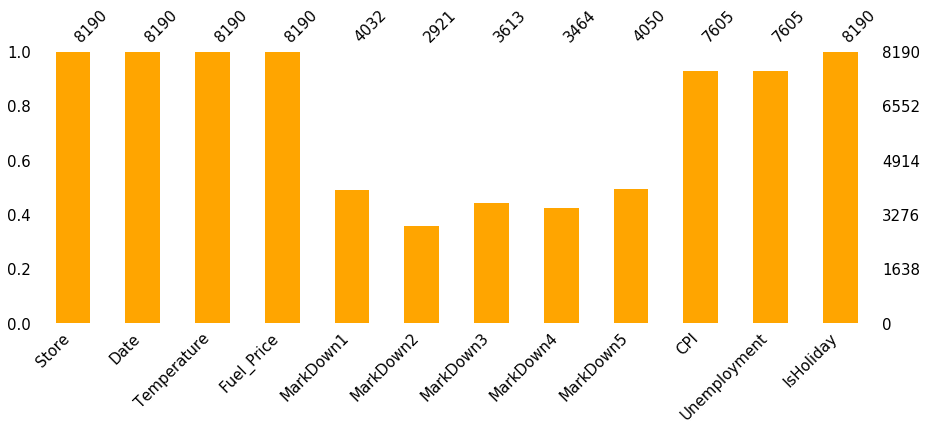

In [6]:
import missingno as msno
msno.bar(features,figsize=(15, 5),fontsize=15,color='orange');

In [7]:
print('Percentages of missing values in features dataframe.')
(100*features.isna().sum()/features.shape[0]).sort_values()

Percentages of missing values in features dataframe.


Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
IsHoliday        0.000000
CPI              7.142857
Unemployment     7.142857
MarkDown5       50.549451
MarkDown1       50.769231
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown2       64.334554
dtype: float64

All the markdown<sub>i</sub> columns have more than 50% missing values. These are anonymized data related to promotional markdowns that the retail chain is running. MarkDown data is only available after Nov 2011. Let's do EDA first.

### EDA

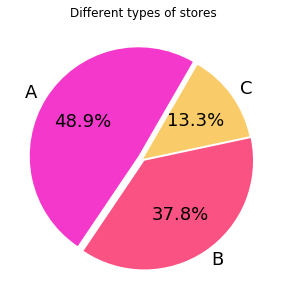

In [8]:
# pie chart
labels = stores.Type.value_counts().index.tolist()
sizes = stores.Type.value_counts().values.tolist()
explode = (0.05, 0.02, 0)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=60,
        textprops={'fontsize': 18},colors=['#f538cc','#fa5282','#facc69'])
plt.title('Different types of stores');

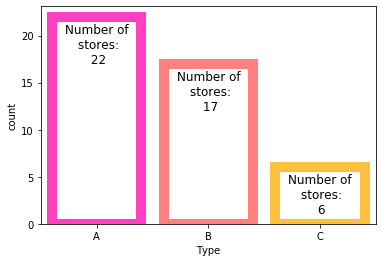

In [9]:
ax = sns.countplot(stores.Type ,facecolor=(0,0,0,0),linewidth=10,
                   edgecolor=sns.color_palette("spring", 3))
for p in ax.patches:
    ax.annotate(f'Number of\n stores:\n {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()-4),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=12);

Almost half of the stores are of type A. Type C stores are least in number.

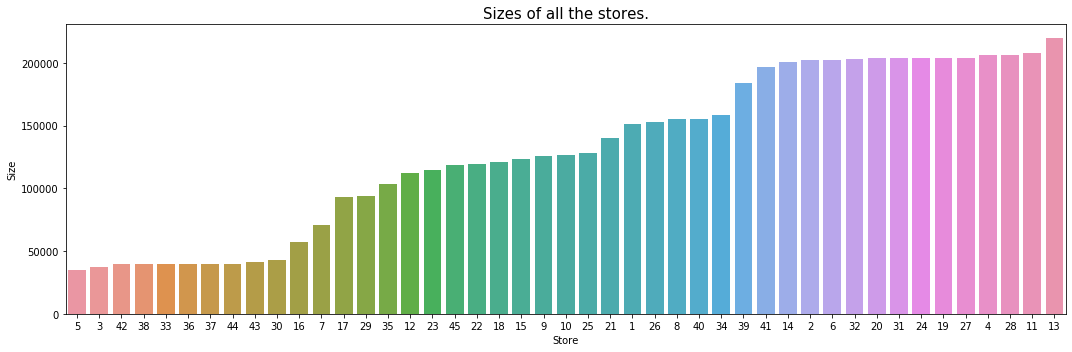

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Sizes of all the stores.',fontsize=15)
plt.tight_layout();

There are broadly 3 types of stores: small-sized, medium-sized and large-sized. This numerical variable can be converted into categorical variable using pd.cut function but first let's check relation between size and type of the stores.

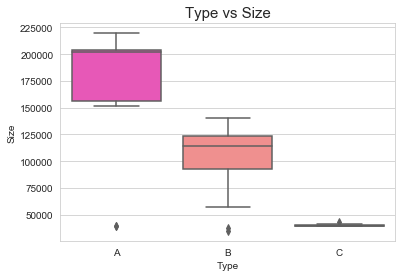

In [11]:
sns.set_style('whitegrid')
sns.boxplot(x='Type',y='Size',data=stores,palette='spring')
plt.title('Type vs Size',fontsize=15);

Though we don't have any knowledge about how stores were divided into these types, we can see from the graph that it covers the effect of size column.

In [12]:
# combining train/test and stores and features dataframes for further analysis

train_expanded = train.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
train_expanded = train_expanded.merge(stores, how='inner', on=['Store'])

test_expanded = test.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
test_expanded = test_expanded.merge(stores, how='inner', on=['Store'])

# converting dtype of date column
train_expanded['Date'] = pd.to_datetime(train_expanded['Date'])
test_expanded['Date'] = pd.to_datetime(test_expanded['Date'])

In [13]:
train_expanded.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315


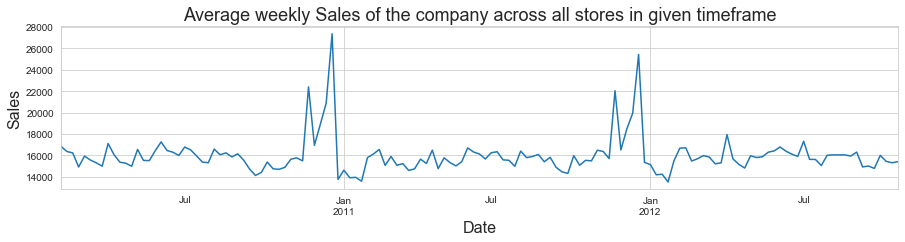

In [14]:
plt.figure(figsize=(15,3))
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

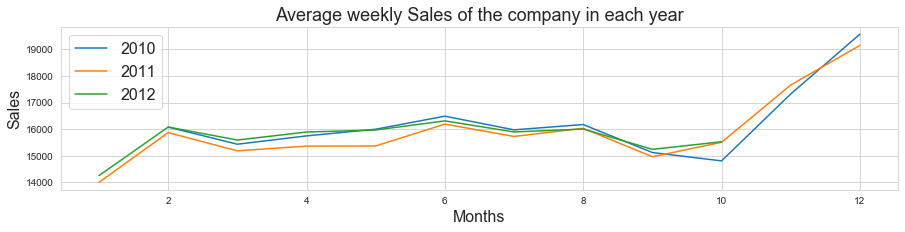

In [15]:
# creating 3 new features from date column

for df in [train_expanded,test_expanded]:
    df['Week'] = df['Date'].dt.week
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

plt.figure(figsize=(15,3))
train_expanded[train_expanded['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company in each year', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

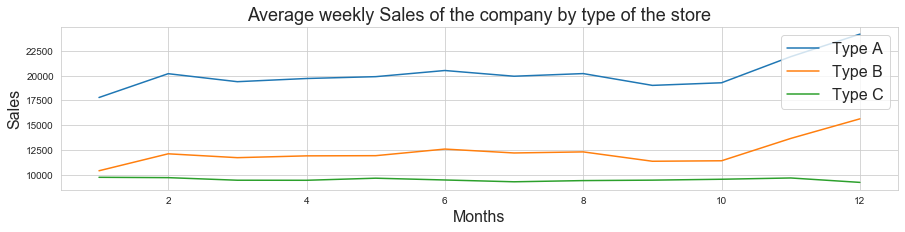

In [16]:
plt.figure(figsize=(15,3))
train_expanded[train_expanded['Type']=='A'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='B'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='C'].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company by type of the store', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

Sales of the company see rise during the end of the year. Possible reasons could be any tradition or festival in that company.

Type A stores seem to have comparitively high sales. But this can be due to difference in number of stores of different type. Also, we can notice that sales of type C are constant over the year.

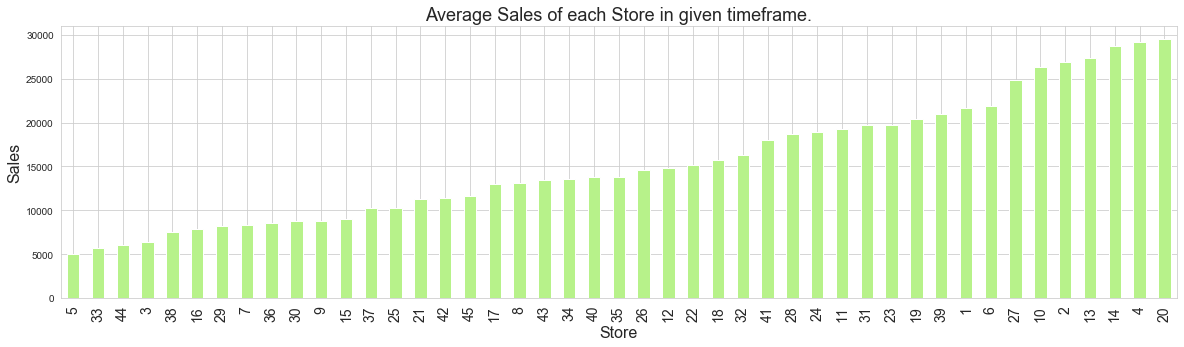

In [17]:
def av_sales_plotter(str):
    plt.figure(figsize=(20,5))
    train_expanded.groupby(str).mean()['Weekly_Sales'].sort_values().plot(kind='bar',color='#b7f28a')
    plt.title(f'Average Sales of each {str} in given timeframe.', fontsize=18)
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel(str, fontsize=16)
    plt.tick_params(axis='x', labelsize=14)
    
av_sales_plotter('Store')

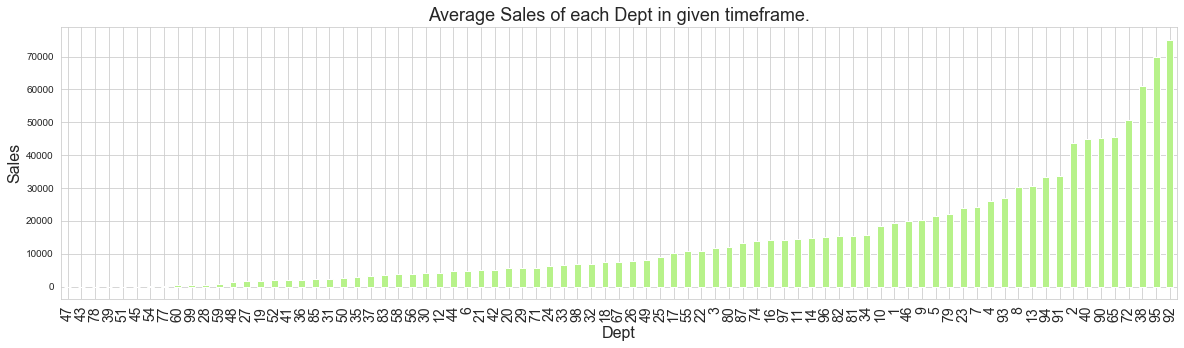

In [18]:
av_sales_plotter('Dept')

Around 10 departments have lowest sales. The company can further analyse as to what are the possible reasons and how it can be improved.

IsHoliday vs Weekly_Sales


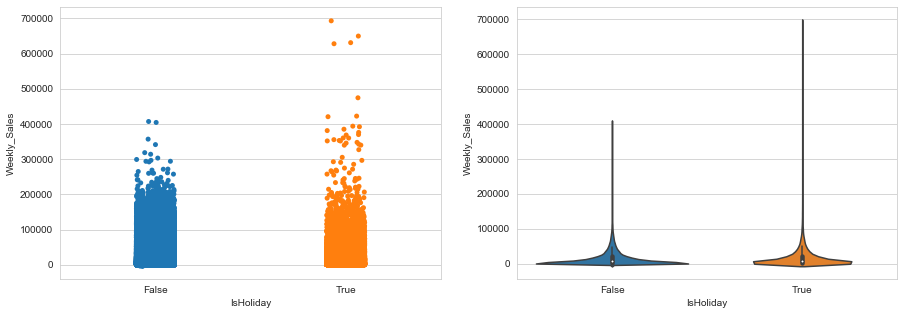

In [19]:
print('IsHoliday vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(y=train_expanded['Weekly_Sales'],x=train_expanded['IsHoliday'])
plt.subplot(1,2,2)
sns.violinplot(y=train_expanded['Weekly_Sales'],x=train_expanded['IsHoliday']);

Highest sales events were recorded in the special holiday week.

Type vs Weekly_Sales


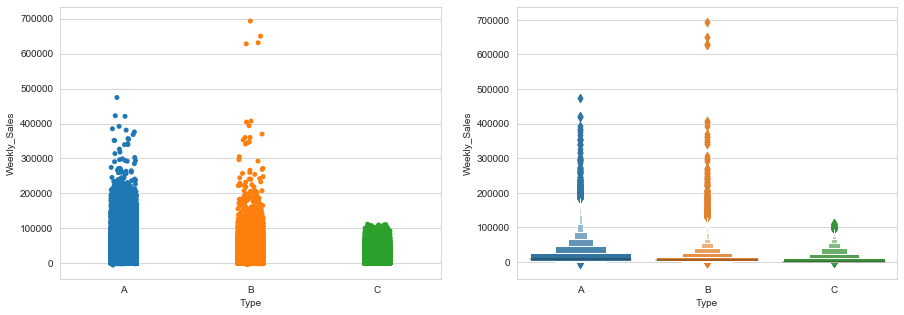

In [20]:
print('Type vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(y=train_expanded['Weekly_Sales'],x=train_expanded['Type'])
plt.subplot(1,2,2)
sns.boxenplot(y=train_expanded['Weekly_Sales'],x=train_expanded['Type']);

Highest sales events were recorded in the type B stores.

Weekly sales vs size


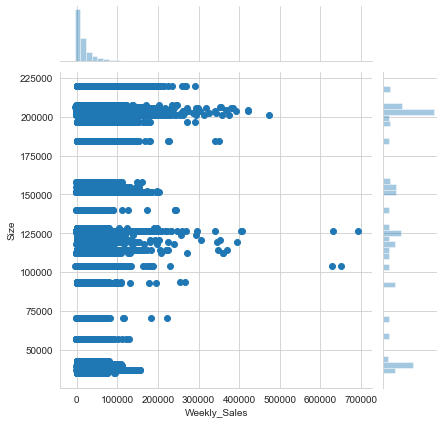

In [21]:
print('Weekly sales vs size')
sns.jointplot(train_expanded['Weekly_Sales'],train_expanded['Size']);

No specific pattern.

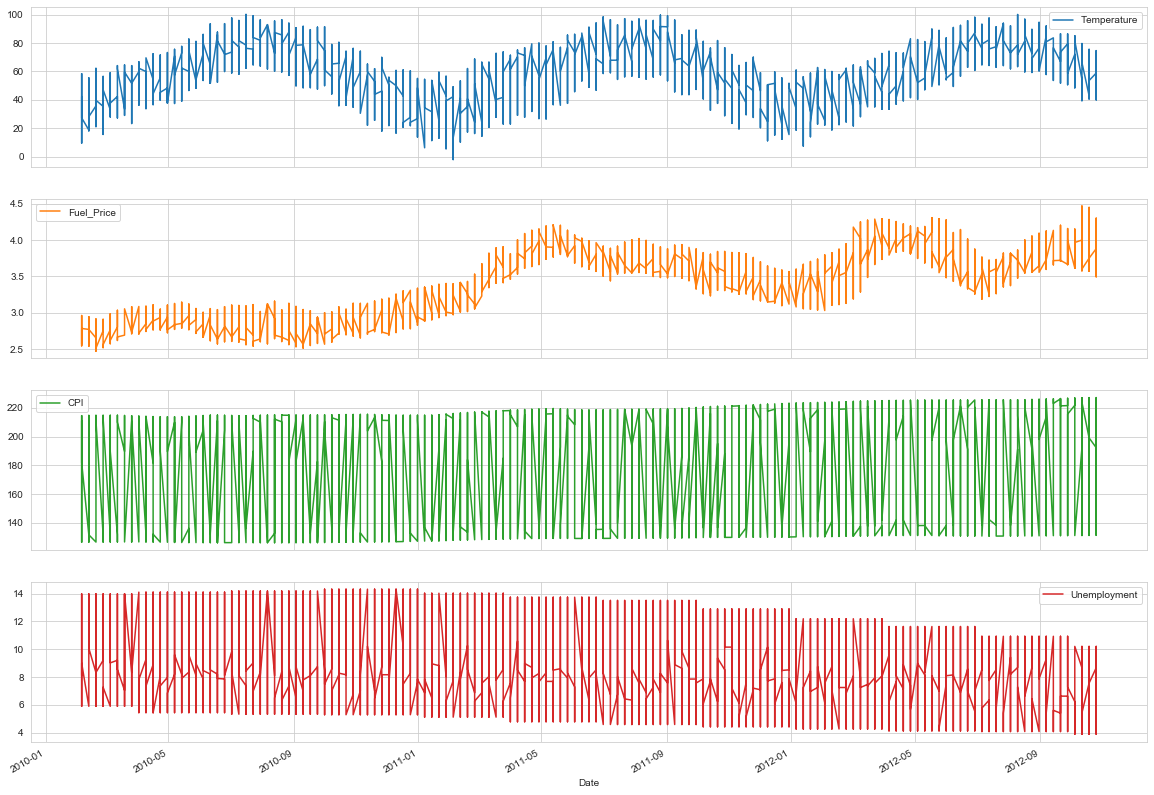

In [22]:
train_expanded[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(20,15));

As expected, temperature has high seasonality. Week and month column can effectively cover its effect.

Fuel price and CPI show an upward trend and unemployment shows downward trend.

Let's explore effect of these feature with weekly sales.

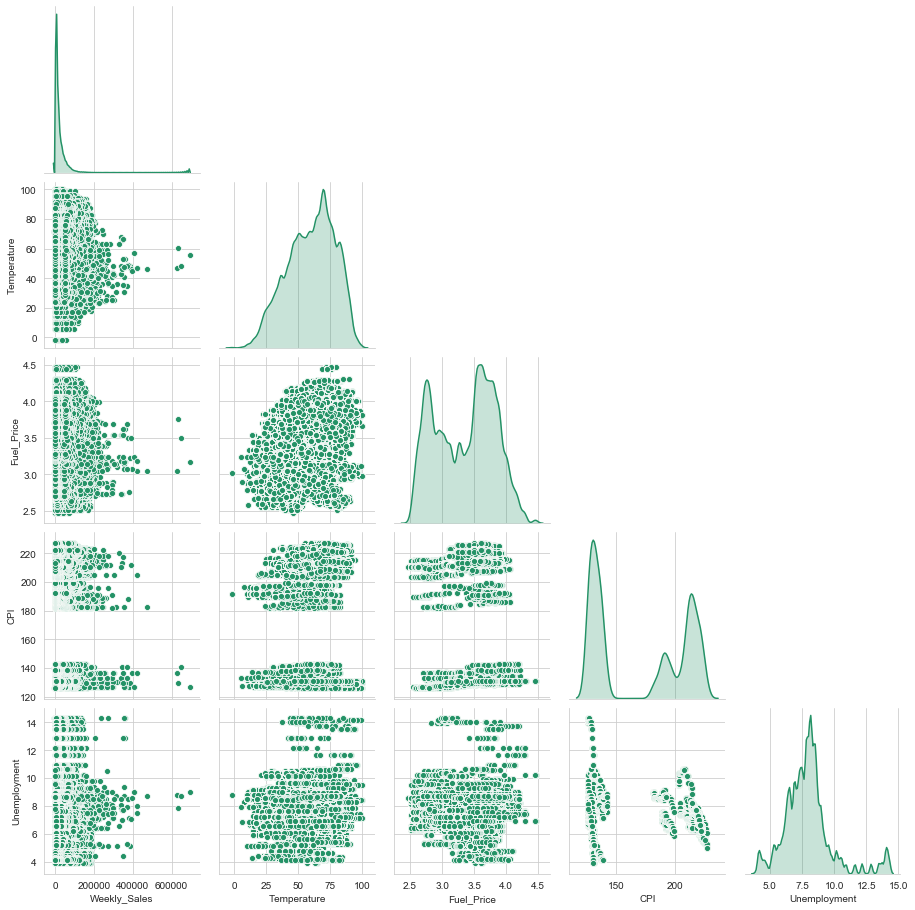

In [23]:
sns.set_palette("summer")
sns.pairplot(train_expanded[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']],
             corner=True,diag_kind="kde");

There is no particular relationship between these features and target variable.

Also, distribution of target variable is highly skewed. That's why, I will not go with linear regression.

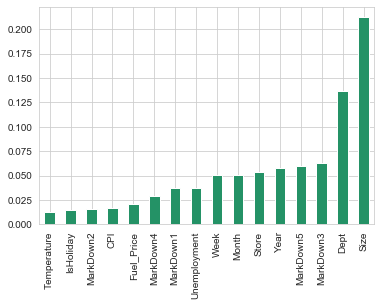

In [24]:
train_expanded.dropna().corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

Dize and Dept are most correlated with the target variable.

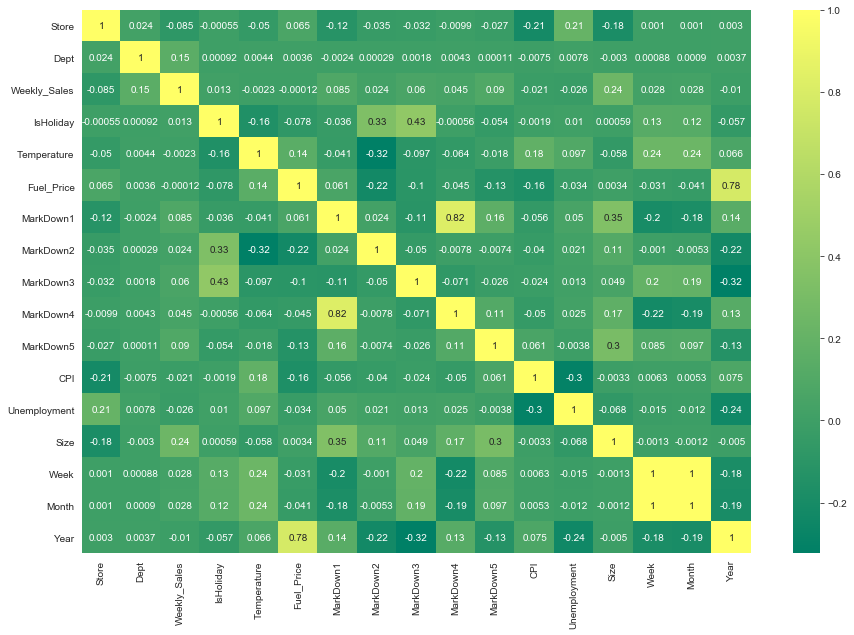

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(train_expanded.corr(),annot=True,cmap='summer');

In above heatmap, correlation between different columns can be checked.

## Pre-processing and modelling

In [26]:
# importing relevant libraries

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

I will label encode the IsHoliday and Type feature. From EDA, I concluded to drop Year, CPI, unemployment, temperature and fuel price. I am also dropping all the 'markdown' columns.

In [27]:
# preprocessing

def preprocessor(df):
    # label-encoding
    df['IsHoliday'] = df['IsHoliday'].astype('str').map({'True':0,'False':1})
    df.Type = df.Type.map({'A':2,'B':1,'C':0})
    # deleting less important features
    return df.drop(['Date','Year','MarkDown1','MarkDown2','MarkDown4','MarkDown3','MarkDown5','CPI',
             'Unemployment','Temperature','Fuel_Price'],axis=1)

train_preprocessed = preprocessor(train_expanded)
test_preprocessed = preprocessor(test_expanded)

In [28]:
# splitting data into 2 parts

y = train_preprocessed["Weekly_Sales"]
X = train_preprocessed.drop(['Weekly_Sales'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

# function for displaying scores

def score_calc(predictions):
    scores = pd.DataFrame([mean_absolute_error(y_test, predictions)
#                           ,mean_squared_error(y_test, predictions)
                          ,r2_score(y_test, predictions)],columns=['score'],index=['MAE','R2 score'])
    return scores

# function for building model

def run_model(model,name):
    
    name = model()
    name.fit(X_train, y_train)
    preds = name.predict(X_test)
    try:
        feat_imp = name.feature_importances_
        plt.bar(X_train.columns,feat_imp,color='green')
        plt.title('Feature Importance graph')
        plt.xticks(rotation=45)
    except:
        pass
    return score_calc(preds)

In [29]:
train_preprocessed.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Week,Month
0,1,1,24924.50,1,2,151315,5,2
1,1,1,46039.49,0,2,151315,6,2
2,1,1,41595.55,1,2,151315,7,2
3,1,1,19403.54,1,2,151315,8,2
4,1,1,21827.90,1,2,151315,9,3


<b> Approach 1: Taking all columns</b>

,score
MAE,1972.534720
R2 score,0.953288


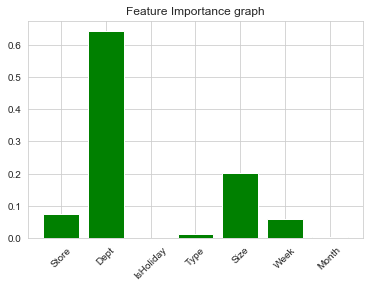

In [30]:
run_model(DecisionTreeRegressor,'dtree')

,score
MAE,1762.471861
R2 score,0.967655


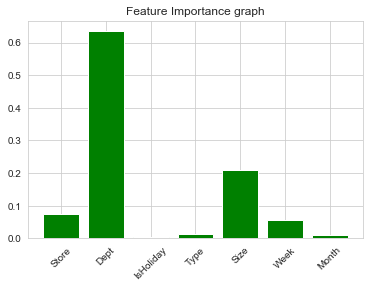

In [31]:
run_model(RandomForestRegressor,'rfc')

,score
MAE,2902.043906
R2 score,0.945758


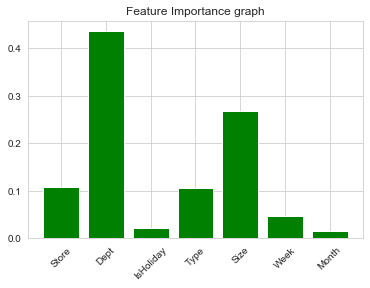

In [32]:
run_model(XGBRegressor,'xgb')

In [33]:
run_model(KNeighborsRegressor,'knn')

,score
MAE,5831.050779
R2 score,0.760129


<b> Approach 2: Standardizing size column</b>

In [34]:
# scaling size column
scaler=StandardScaler()
scaler.fit(train_preprocessed['Size'].values.reshape(-1,1))
X_train['Size'] = scaler.transform(X_train['Size'].values.reshape(-1, 1))
X_test['Size'] = scaler.transform(X_test['Size'].values.reshape(-1, 1))

,score
MAE,1969.642190
R2 score,0.958465


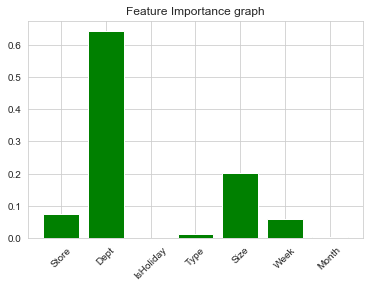

In [35]:
run_model(DecisionTreeRegressor,'dtree')

In [36]:
# run_model(XGBRegressor,'xgb')

In [37]:
# run_model(RandomForestRegressor,'rfc')

<b> Approach 3: Using only Store, Dept and Size columns</b>

In [38]:
X_train = X_train[['Store','Dept','Size']]
X_test = X_test[['Store','Dept','Size']]

,score
MAE,2661.648621
R2 score,0.905231


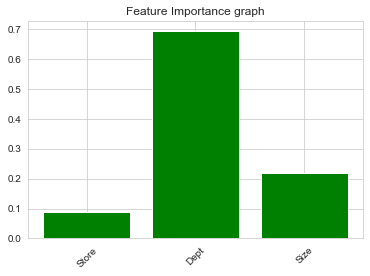

In [39]:
run_model(DecisionTreeRegressor,'dtree')

In [40]:
# I tried one hot encoding week feature but score did not improve so I dropped the idea.

# dummies=pd.get_dummies(train_preprocessed.Week.astype(str),drop_first=True,prefix='week')
# dum_week = pd.concat([train_preprocessed,dummies],axis=1)
# dum_week.drop('Week',axis=1,inplace=True)

### Cross-validation

In [41]:
# option A
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestRegressor(), X, y, cv=4)
print(f"Average 4-Fold CV Score: {score.mean().round(4)}")

Average 4-Fold CV Score: 0.6918


### Hyper parameter tuning

In [9]:
random_grid = {'n_estimators': [50,60,70],
               'max_features': [3,4],
               'max_depth': [25,30,35],
               'min_samples_split': [3,4],
              'min_samples_leaf':[1,2]}

rf_grid = RandomizedSearchCV(RandomForestRegressor(),
                        random_grid,
                        cv = 4,
                        n_jobs = 5,
                        verbose=True)

rf_grid.fit(X,y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed: 10.9min finished


0.7423466235955355
{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': 30}


In [ ]:
# parameters = {'learning_rate': [.03, 0.05, .07],
#               'max_depth': [6,7,8,9],
#               'n_estimators': [500,700]}

# xgb_grid = GridSearchCV(XGBRegressor(),
#                         parameters,
#                         cv = 3,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(X,y)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [43]:
# option B - cross-validation using kfold

predictor_train_scale = train_preprocessed.drop('Weekly_Sales',axis=1)
predictor_test_scale = test_preprocessed
target_train = train_preprocessed.Weekly_Sales

kf=KFold(n_splits=4,shuffle=True)

preds_3   = list()
y_pred_3  = []
r2_score_ = []
mae=[]

# Applying model on each fold and calculating mean of score
for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train_scale)):    
    
    X_train, y_train = predictor_train_scale.iloc[train_idx,:], target_train.iloc[train_idx]    
    X_val, y_val = predictor_train_scale.iloc[val_idx, :], target_train.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    r2 = r2_score(y_val,rf.predict(X_val))
    mae_ = mean_absolute_error(y_val,rf.predict(X_val))
    r2_score_.append(r2)
    mae.append(mae_)
    preds_3.append(rf.predict(predictor_test_scale[predictor_test_scale.columns]))
    
y_pred_final_3 = np.mean(preds_3,axis=0)    

print('R2 - CV Score: {}'.format((sum(r2_score_)/4)),'\n')
print('MAE Score: {}'.format((sum(mae)/4)),'\n')
print("Score : ",r2_score_)


Fold: 1


Fold: 2


Fold: 3


Fold: 4

R2 - CV Score: 0.9661474138048447 

MAE Score: 1772.3169587274363 

Score :  [0.9715304004114615, 0.9608007849744428, 0.9699891327521207, 0.9622693370813538]


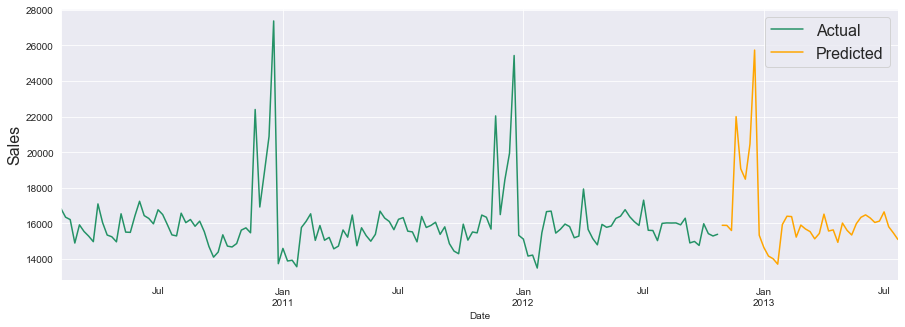

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
test_expanded['Weekly_Sales'] = y_pred_final_3
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
test_expanded.groupby('Date')['Weekly_Sales'].mean().plot(color='orange')
plt.legend(['Actual', 'Predicted'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16);

### Making final predictions

In [46]:
test_expanded['Weekly_Sales'] = y_pred_final_3
test_expanded[['Date','Weekly_Sales']].to_csv('results_rf_cv_tuned.csv',index=False)

### DNN

In [50]:
#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
# Splitting train set into training and validation sets.
y = train_preprocessed["Weekly_Sales"]
X = train_preprocessed.drop(['Weekly_Sales'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)
X_train, X_val, y_train, y_val = train_test_split(X_train.astype('float64'),y_train.astype('float64'),test_size=0.20)

In [75]:
#creating model
model = Sequential()
model.add(Dense(7,activation='tanh',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(100,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1))

In [76]:
model.compile(optimizer='Adam', loss='mean_absolute_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [77]:
model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_val.values,y_val.values),
          batch_size=10000,epochs=150,callbacks=[early_stop])

Train on 202353 samples, validate on 50589 samples
Epoch 1/150
202353/202353 [==============================] - 8s 38us/sample - loss: 15967.0137 - val_loss: 16038.2045
Epoch 2/150
202353/202353 [==============================] - 6s 31us/sample - loss: 15958.9028 - val_loss: 16034.2843
Epoch 3/150
202353/202353 [==============================] - 5s 26us/sample - loss: 15955.3640 - val_loss: 16031.7715
Epoch 4/150
202353/202353 [==============================] - ETA: 0s - loss: 15949.399 - 5s 24us/sample - loss: 15952.8526 - val_loss: 16029.4361
Epoch 5/150
202353/202353 [==============================] - 4s 19us/sample - loss: 15950.5455 - val_loss: 16027.1927
Epoch 6/150
202353/202353 [==============================] - 6s 27us/sample - loss: 15948.3347 - val_loss: 16025.0115
Epoch 7/150
202353/202353 [==============================] - 6s 31us/sample - loss: 15946.1732 - val_loss: 16022.8895
Epoch 8/150
202353/202353 [==============================] - 6s 28us/sample - loss: 15944.0728 

202353/202353 [==============================] - 5s 24us/sample - loss: 15831.7749 - val_loss: 15908.8799
Epoch 70/150
202353/202353 [==============================] - 5s 23us/sample - loss: 15830.0656 - val_loss: 15907.1412
Epoch 71/150
202353/202353 [==============================] - 5s 23us/sample - loss: 15828.3150 - val_loss: 15905.4148
Epoch 72/150
202353/202353 [==============================] - 5s 24us/sample - loss: 15826.5238 - val_loss: 15903.6884
Epoch 73/150
202353/202353 [==============================] - 5s 24us/sample - loss: 15824.8536 - val_loss: 15901.9595
Epoch 74/150
202353/202353 [==============================] - 5s 23us/sample - loss: 15823.0796 - val_loss: 15900.2393
Epoch 75/150
202353/202353 [==============================] - 5s 23us/sample - loss: 15821.4400 - val_loss: 15898.5200
Epoch 76/150
202353/202353 [==============================] - 5s 23us/sample - loss: 15819.7173 - val_loss: 15896.7969
Epoch 77/150
202353/202353 [==============================] -

202353/202353 [==============================] - 5s 23us/sample - loss: 15717.6725 - val_loss: 15794.7241
Epoch 138/150
202353/202353 [==============================] - 5s 23us/sample - loss: 15716.0609 - val_loss: 15793.0909
Epoch 139/150
202353/202353 [==============================] - 5s 23us/sample - loss: 15714.3489 - val_loss: 15791.4596
Epoch 140/150
202353/202353 [==============================] - 5s 23us/sample - loss: 15712.7198 - val_loss: 15789.8257
Epoch 141/150
202353/202353 [==============================] - 5s 23us/sample - loss: 15711.1058 - val_loss: 15788.1894
Epoch 142/150
202353/202353 [==============================] - 5s 24us/sample - loss: 15709.5182 - val_loss: 15786.5571
Epoch 143/150
202353/202353 [==============================] - 5s 25us/sample - loss: 15707.7621 - val_loss: 15784.9283
Epoch 144/150
202353/202353 [==============================] - 5s 25us/sample - loss: 15706.1602 - val_loss: 15783.2962
Epoch 145/150
202353/202353 [=========================

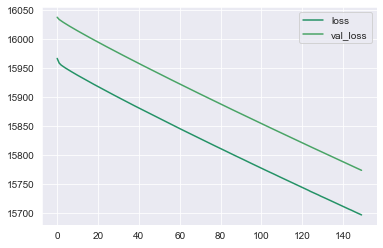

In [78]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [86]:
dnn_pred = model.predict(X_test.values)
mean_absolute_error(y_test,dnn_pred),r2_score(y_test,dnn_pred)

(15631.003728145168, -0.4742468677948941)